### Arboles de decision
* se calcula la entropia (medida de desorden de un conjunto de datos) inicial del sistema basandose en la variable objetivo a predecir 
* se busca la homogeneidad de los datos
* calculamos la ganancia de informacion para cada variable candidata, seleccionando las que no de maxima ganancia de informacion como nodo de decision
* se repite este paso para cada rama de cada nodo (el nuevo nodo se llama nodo hoja)
* comprobamos si el nodo hoja clasifica bien (entropia nula, homogeneidad perfecta) , sino continuamos 
* el algoritmo para cuando la entropia es nula, o cuando nosotros se lo decimos, ya que podria ser infinito (max numero arboles o interaciones por ejemplo)
* otros algoritmo usan como referencia el indice gini, chi al cuadrado (chaid), o metodo reduccion de la varianza
* para evitar que el arbol tienda a infinito, y crea overfiting, que se comporta bien con el training pero mal con otros sets, hacemos poda del arbol (reduccion del error en la poda, poda del coste de complejidad)
* https://sitiobigdata.com/2019/12/14/arbol-de-decision-en-machine-learning-parte-1/
* https://sitiobigdata.com/2019/12/14/arboles-de-decision-en-machine-learning-parte-2/

### problemas habituales arboles
* en el caso de las variables continuas hay que encontrar umbrales optimos de corte (treshold) para convertilos en categoricas
* con valores nan : asignar el valor mas comun de la categoria donde falta la variable "teniendo en cuenta la variable de decision de la que faltan valores"; o sea, veo que columna falta un valor, compruebo su variable y, entonces de todas las variables y con esa caracteristica escogo la mas comun

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# usaremos el dataset de iris
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\iris\Iris.csv"
data = pd.read_csv(url)
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [23]:
data = data.drop("Id",axis=1)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

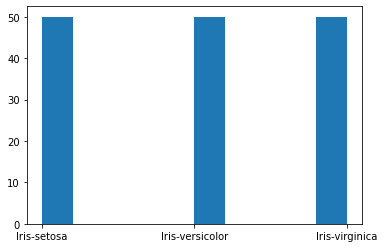

In [24]:
# vemos que estan compensadas
plt.hist(data.Species)

In [25]:
# separamos las columnas entre predictora y demas
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [26]:
# hacemos de forma manual la seleccion train y test (se puede hacer con train split)
data["is_train"] = np.random.uniform(0,1,len(data))<=0.75

In [27]:
data["is_train"].value_counts()

True     114
False     36
Name: is_train, dtype: int64

In [28]:
train, test = data[data["is_train"]==True],data[data["is_train"]==False]

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
trees = DecisionTreeClassifier(criterion="entropy",min_samples_split=20, random_state=99)
trees.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [36]:
preds = trees.predict(test[predictors])

In [37]:
pd.crosstab(test[target],preds,rownames=["actual"],colnames=["prediction"])

prediction,Iris-setosa,Iris-versicolor,Iris-virginica
actual,,,
Iris-setosa,13,0,0
Iris-versicolor,0,11,1
Iris-virginica,0,2,9


In [ ]:
# vemos que clasifica bien setos y versicolor, y ha tenido dos fallos con virginica

### visualizacion arbol decision

In [45]:
data.Species.unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [46]:
predictors

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

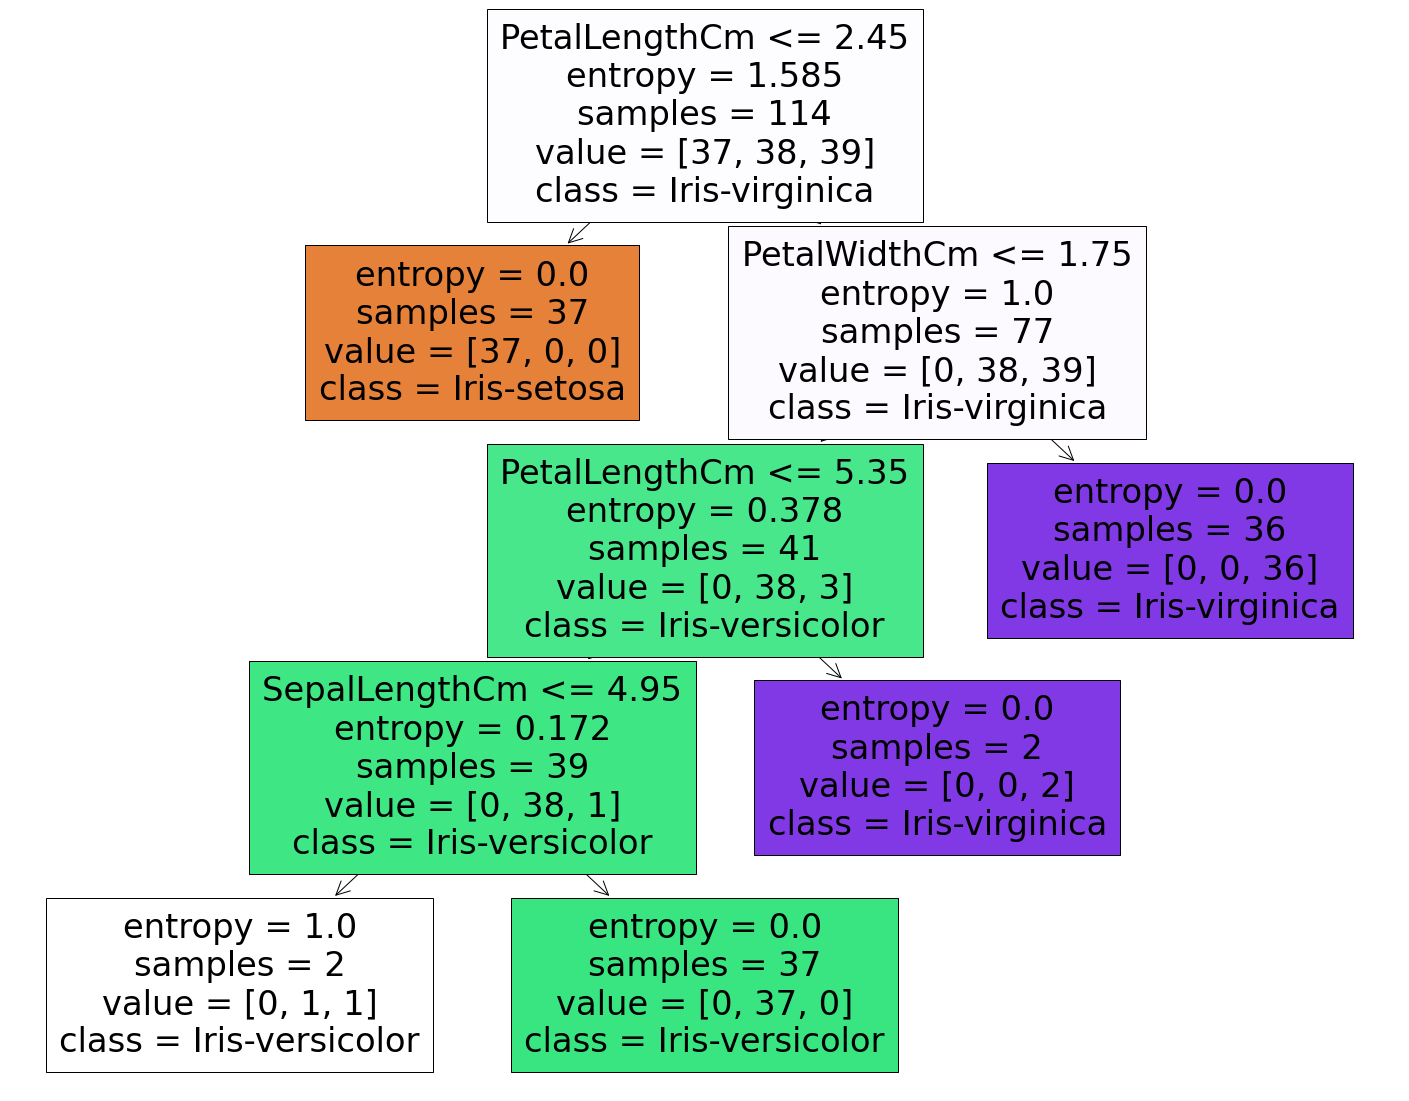

In [47]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(trees, 
                   feature_names=predictors,  
                   class_names=data.Species.unique().tolist(),
                   filled=True)

* lo primero es la condicion(ej cm<=), despues la entropia, cuando es 0 se para ya que tiene la informacion suciente, 
* hacia la izquierda son siempre true, donde se para, y por la derecha sigue expandiensose
* values son los valores que se van repartiendo hacia un lado u otro

In [49]:
# podemos ver tambien el accuracy
trees.score(test[predictors],test[target])

0.9166666666666666

In [ ]:
### cross validation para el arbol (para podarlo :))